# ML T-Generation Занятие 2: Data Wrangling Основы работы с векторными данными и визуализацией. NumPy, Pandas и matplotlib.

# Pandas

**Pandas** - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

In [2]:
import pandas as pd
import numpy as np
#магия для отображения графиков в тетрадке
%matplotlib inline 

На первое время хорошо держать под рукой шпаргалку с набором полезных функций

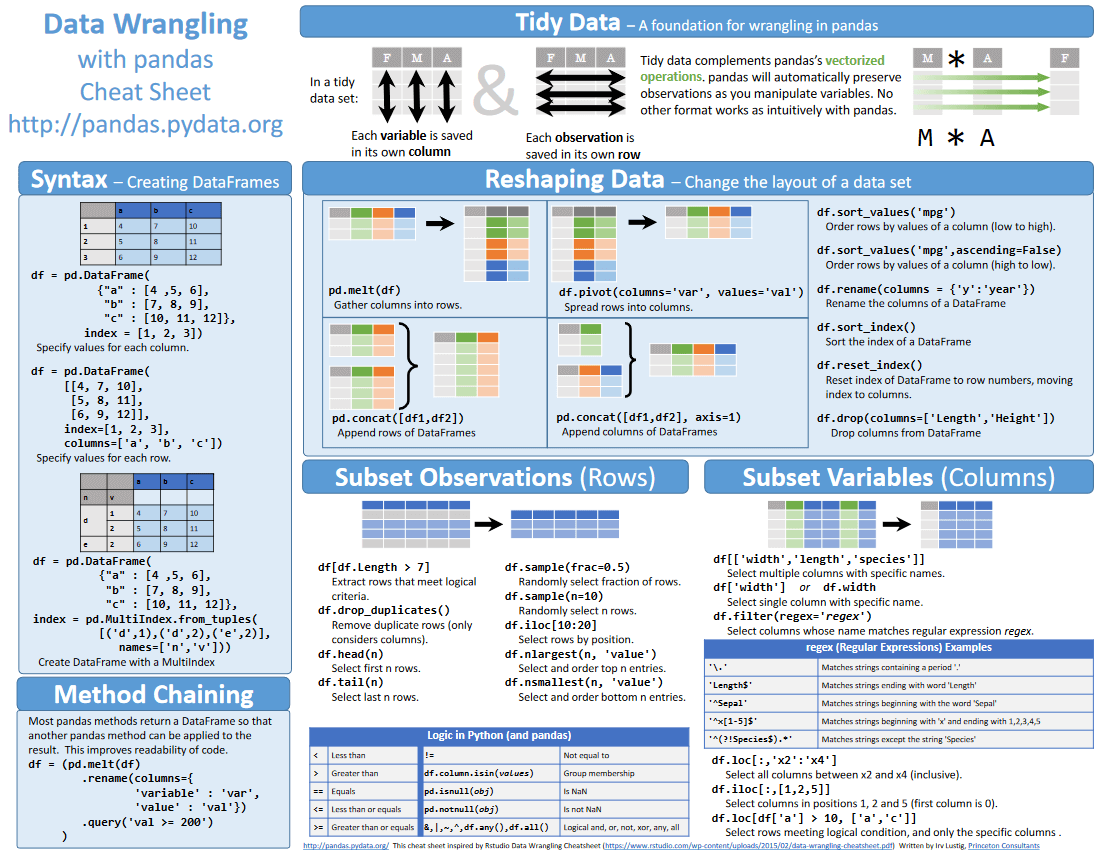

In [2]:
from IPython.display import Image
Image('pandas1.png') 

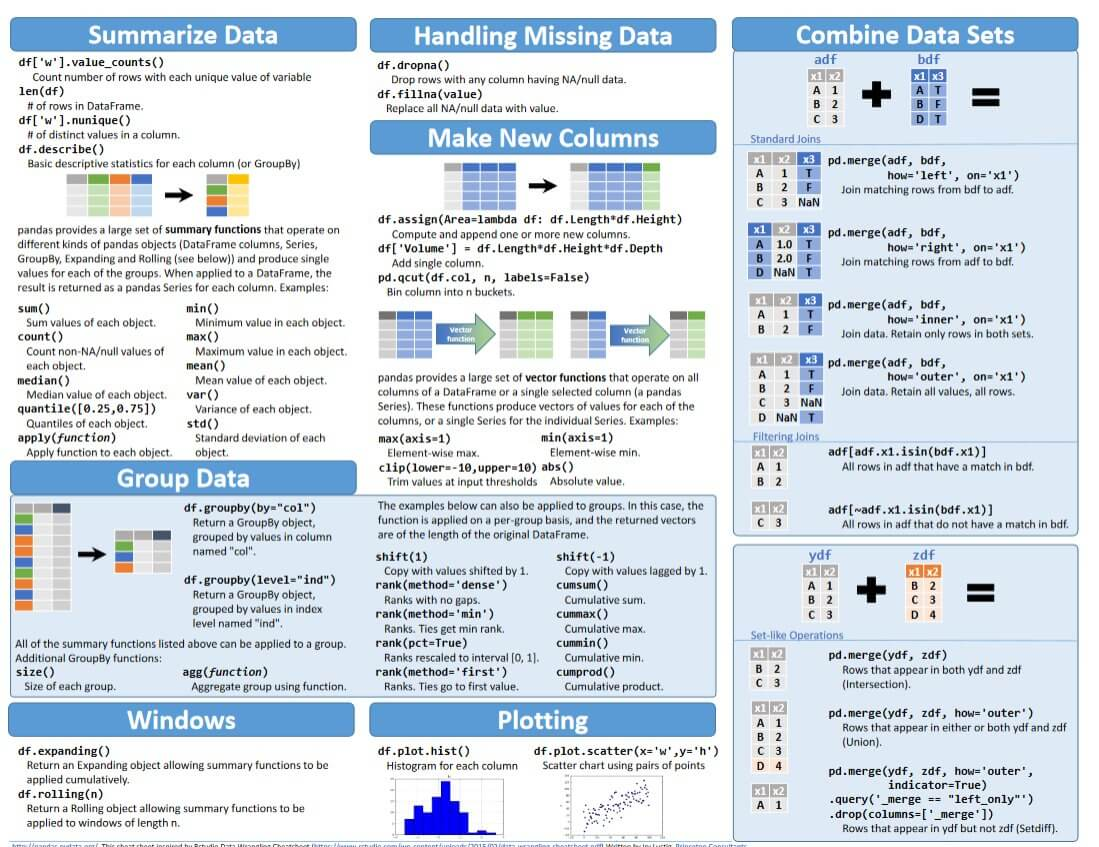

In [3]:
from IPython.display import Image
Image('pandas2.jpg') 

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Для начала рассмотрим простые примеры создания таких объектов и возможных операций над ними.

### Series

** Создание объекта Series из 5 элементов, индексированных буквами:**

In [ ]:
salaries = pd.Series([400, 300, 200, 250], 
              index = ['Andrew', 'Bob', 
                       'Charles', 'Ann']) 
salaries                                                               

In [ ]:
# тут можно наблюдать "консистентность" между библиотеками numpy и pandas
salaries[salaries > 250]

**Индексирование возможно в виде s.Name или s['Name'].**

In [ ]:
salaries.Andrew == salaries['Andrew']

In [ ]:
salaries['Andrew'], salaries.Andrew

**Series поддерживает пропуски в данных.**

In [ ]:
salaries['Carl'] = np.nan
salaries

In [ ]:
salaries['Carl']

In [ ]:
salaries

In [ ]:
salaries.fillna(salaries.median(), inplace=True)

In [ ]:
salaries

**Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.**

In [ ]:
print('Второй элемент серии', salaries[1], '\n')
# Smart indexing
print(salaries[:3], '\n')
print(len(salaries[salaries > 0]), 'Положительных значение\n')

In [ ]:
salaries

Можно передавать в функции numpy

In [ ]:
print(np.exp(salaries))

### DataFrame

### Создание и изменение

**Альтернативным способом является создание DataFrame из словаря numpy массивов или списков.**

In [2]:
df2 = pd.DataFrame({'A': np.random.random(5), 
                    'B': ['a', 'b', 'c', 'd', 'e'], 
                    'C': np.arange(5) > 2})
df2

,A,B,C
0,0.906780,a,False
1,0.882247,b,False
2,0.134750,c,False
3,0.462233,d,True
4,0.242675,e,True


In [ ]:
type(df2)

**Обращение к элементам (или целым кускам фрейма):**

In [ ]:
print('Элемент на 3 позиции в столбце 3 = ', df2.at[3, 'B'], '\n')
print(df2.loc[1:4, 'A':'C'])

**Изменение элементов и добавление новых:**

In [ ]:
df2.at[2, 'B'] = 'f'
df2

In [ ]:
df2.loc[4]

In [ ]:
df2.loc[5] = [3.1415, 'c', False]
df2

In [ ]:
df1 = df2.copy()
df1

In [ ]:
df1.columns = ['A', 'B', 'C']
df3 = df1.append(df2)
df3

#### Обработка пропущенных значений

In [ ]:
df1.at['o2', 'A'] = np.nan
df1.at['o4', 'C'] = np.nan
df1

**Булева маска для пропущенных значений (True - там, где был пропуск, иначе - False):**

In [ ]:
pd.isnull(df1)

**Можно удалить все строки, где есть хотя бы один пропуск.**

In [ ]:
df1

In [ ]:
df1.dropna(axis=0)

In [ ]:
df1

In [ ]:
df1.shape

In [ ]:
df1.shape[0]*[0]

In [ ]:
df1['D'] = df1.shape[0]*[np.nan]

In [ ]:
df1

In [ ]:
df1.dropna(how='all', axis=1)

**Пропуски можно заменить каким-то значением.**

In [ ]:
df1.fillna()

## Пример первичного анализа данных с Pandas

In [4]:
import os
import pandas as pd

Рассмотрим данную библиотеку на примере [данных](https://www.kaggle.com/c/titanic/data) [соревнования](https://www.kaggle.com/c/titanic) о предсказании судьбы пассажиров лайнера "Титаник". Имеется некоторая информация о пассажирах, по которой необходимо предсказать выживаемость каждого из них.
* Какого типа данная задача?
* Что является объектами?
* Что является ответами?
* Какие могут быть признаки? Какие у них типы?

Скачаем данные:

In [5]:
pass_data = pd.read_csv('titanic.csv', sep='\t')

Данные представляют из себя таблицу, где строка — объект, столбец — признак. Для экономии места можно выводить заданное количество первых строк объекта при помощи метода head():

In [ ]:
pass_data.tail(10)

In [ ]:
pass_data.head(3)

In [ ]:
pass_data

Посмотрим на признаки:

In [ ]:
pass_data.columns

В этом ноутбуке мы думали, что названия столбцов начинаются с маленькой буквы, а в данных первая буква заглавная, придется исправить:

In [7]:
pass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  156 non-null    int64  
 1   survived     156 non-null    int64  
 2   pclass       156 non-null    int64  
 3   name         156 non-null    object 
 4   sex          156 non-null    object 
 5   age          126 non-null    float64
 6   sibsp        156 non-null    int64  
 7   parch        156 non-null    int64  
 8   ticket       156 non-null    object 
 9   fare         156 non-null    float64
 10  cabin        31 non-null     object 
 11  embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [6]:
pass_data = pass_data.rename(str.lower, axis="columns")

По данным можно индексироваться при помощи номеров строк/столбцов или названий признаков:

In [ ]:
pass_data[2:5]

In [ ]:
pass_data.iloc[1:5, 1:3]

In [ ]:
pass_data.loc[1:5, "survived":"pclass"]

In [ ]:
pass_data['name'].head()

In [ ]:
pass_data[['name', 'sex', 'pclass']].head()

Также действует и логическая индексация, которая позволяет рассматривать определенные группы объектов:

In [ ]:
pass_data[pass_data['sex'] == 'female'].head() # женщины на борту

In [ ]:
pass_data.shape

In [12]:
# TASK: вывести женщин старше 60 и мужчины на борту
# Ваш код здесь

pass_data[(pass_data['sex'] == 'female') & (pass_data['age'] > 60) | (pass_data['sex'] == 'male') & (pass_data['age'] < 20)]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
67,68,0,3,"Crease, Mr. Ernest James",male,19.00,0,0,S.P. 3464,8.1583,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.00,1,3,W./C. 6608,34.3750,NaN,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C


& - и | - или

In [15]:
# TASK: Посмотрим, сколько на борту было относительно молодых женщин,
# путешествующих в одиночку. Скорее всего, довольно мало,
# потому что в такое длительное путешествие молодых девушек одних не отпустили бы опекающие родственники.
# Ваш код здесь

pass_data[(pass_data['sex'] == 'female') & (pass_data['age'] < 30) & (pass_data['sibsp'] == 0)].shape[0]

13

Кроме того, для заданного признака можно построить гистограмму:

<AxesSubplot:>

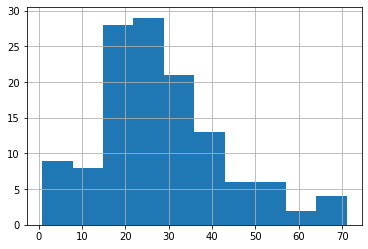

In [20]:
pass_data.age.hist(bins = 10)

## Редактирование DataFrame

* Переименование признаков

In [21]:
pass_data.rename(columns={'sex': 'Sex'}, inplace=True)
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Применение преобразования к существующему признаку. Например, выделим фамилию:

In [22]:
# TASK: написать функцию возвращающее фамилию
def get_last_name(line):
    return line.split(',')[0]

* Добавление признака

In [25]:
pass_data['Last_name'] = pass_data['name'].apply(get_last_name)
pass_data

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,Last_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S,Pears
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S,Meo
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S,van Billiard
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S,Olsen


* Удаление признака

In [26]:
pass_data.drop('Last_name', axis=1).head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,Last_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [28]:
pass_data.drop('Last_name', axis=1, inplace=True)
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Работа с пропущенными данными

In [29]:
pass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  156 non-null    int64  
 1   survived     156 non-null    int64  
 2   pclass       156 non-null    int64  
 3   name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   age          126 non-null    float64
 6   sibsp        156 non-null    int64  
 7   parch        156 non-null    int64  
 8   ticket       156 non-null    object 
 9   fare         156 non-null    float64
 10  cabin        31 non-null     object 
 11  embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


Методы isnull() и notnull() позволяют получить бинарный массив, отражающий отсутствие или наличие данных для каждого из объектов соответственно:

In [37]:
# pass_data['cabin'].isnull().head()

pass_data[pass_data['cabin'].notnull()].head() # пассажиры с известным номером шлюпки эвакуации

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


* Сортировка объектов/признаков

In [35]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=True).head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C


In [36]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=[True, False]).head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S


## Группировка данных

Группировка при помощи метода groupby позволяет объединять данные в группы по одному или нескольким признакам и считать по ним общую статистику.

In [38]:
pass_data.groupby('Sex') # разбиение всех объектов на 2 группы по полу

In [39]:
pass_data.groupby('Sex')['pclass'].value_counts()

Sex     pclass
female  3         35
        2         12
        1          9
male    3         61
        1         21
        2         18
Name: pclass, dtype: int64

In [40]:
pass_data.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,30.0,79.50194,65.172104,26.2833,48.290625,61.6792,78.721875,263.0000
2,30.0,23.65972,16.048141,10.5000,13.000000,21.0000,27.312500,73.5000
3,96.0,13.44006,9.998511,6.7500,7.854200,8.0500,15.309350,56.4958


In [41]:
pass_data.groupby('Sex')['age'].mean() # средний возраст для пассажиров каждого из полов

Sex
female    24.468085
male      30.326962
Name: age, dtype: float64

Как известно, в первую очередь спасали женщин и детей в порядке повышения номера класса, в связи с этим доля выживших женщин, вероятно, будет выше, чем доля выживших мужчин. Проверим:

In [42]:
pass_data.groupby('Sex')['survived'].mean()

Sex
female    0.714286
male      0.140000
Name: survived, dtype: float64

Аналогично для пассажиров различных классов:

In [43]:
pass_data.groupby('pclass')[['survived', 'age']].mean()

,survived,age
pclass,,
1,0.400000,38.111111
2,0.466667,28.114828
3,0.291667,24.307143


Рассмотренные выше статистические данные могут быть рассмотрены и в виде стандартного DataFrame:

In [46]:
pass_data.groupby('Sex', as_index=False)[['survived', 'age']].mean()

,Sex,survived,age
0,female,0.714286,24.468085
1,male,0.140000,30.326962


## Сохранение данных

Также данные можно сохранить в файл:

In [ ]:
pass_data.to_csv('titanic_2.csv', index=False)

# Самостоятельная работа  №2 

In [4]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


In [5]:
# 1. создать датафрейм
# Ваш код здесь

df = pd.DataFrame(data, labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [6]:
# Вывести первые 3 строки
# Ваш код здесь
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [10]:
# Вывести значения где пропущены age
# Ваш код здесь
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [11]:
# Вывести сумму всех посещений
# Ваш код здесь
df['visits'].sum()

19

In [12]:
# Посчитать количество каждого типа в колонке animal
# Ваш код здесь
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

In [ ]:
# Сохранить в формате csv
# Ваш код здесь

# Тут могло быть сохранение, но Кирилл сказал, что можно его не делать
# df.to_csv(путь_до_файла)